# Plotting MITRE ATT&CK embeddings

/home/malchemis/anaconda3/envs/chatAi/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/home/malchemis/anaconda3/envs/chatAi/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


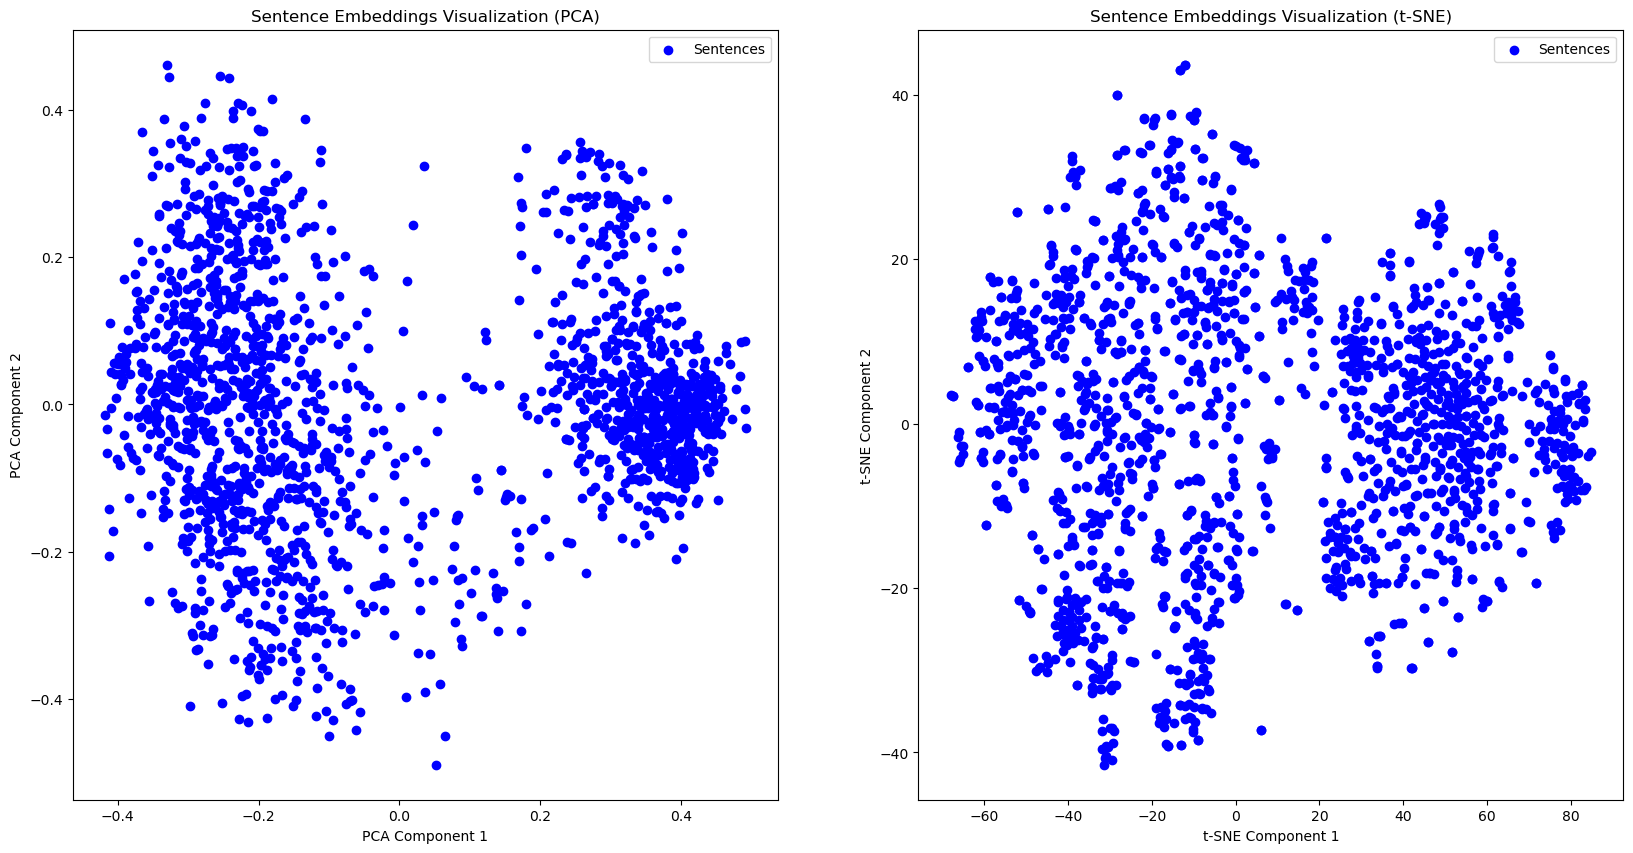

In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load pre-trained model
cache_dir = '/home/malchemis/workspace/Resources/models'
data_dir = '/home/malchemis/workspace/Resources/data'
sentenceTransformerModel = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', cache_folder=cache_dir)

# Load MITRE data
mitre = pd.read_csv(f'{data_dir}/mitre.csv')

# Extract the sentences
sentences = mitre['text'].tolist()

# Generate embeddings for the sentences
embeddings = sentenceTransformerModel.encode(sentences)

# Reduce the dimensionality of embeddings for visualization using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# Reduce the dimensionality of embeddings for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(np.array(embeddings.tolist()))

# Plot the reduced embeddings
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# PCA plot
ax[0].scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1], c='blue', label='Sentences')
ax[0].set_title('Sentence Embeddings Visualization (PCA)')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')
ax[0].legend()

# t-SNE plot
ax[1].scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c='blue', label='Sentences')
ax[1].set_title('Sentence Embeddings Visualization (t-SNE)')
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')
ax[1].legend()

plt.show()

/home/malchemis/anaconda3/envs/chatAi/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


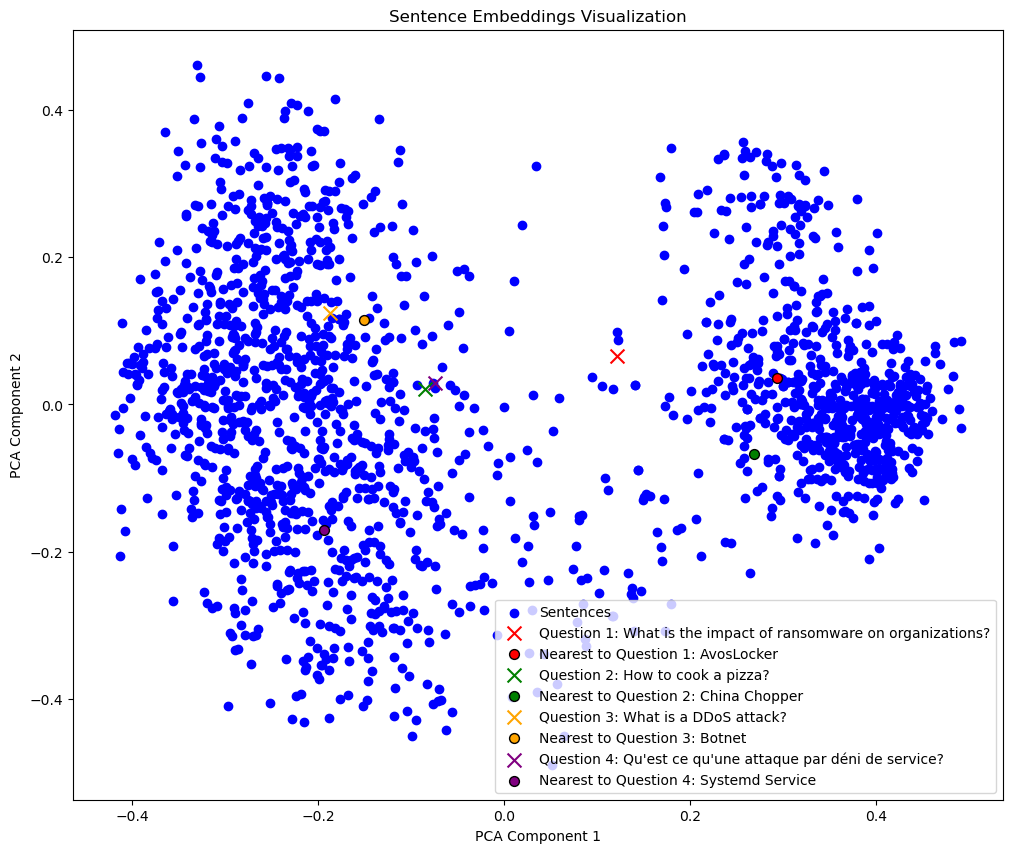

In [2]:
import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load pre-trained model
cache_dir = '/home/malchemis/workspace/Resources/models'
data_dir = '/home/malchemis/workspace/Resources/data'
sentenceTransformerModel = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', cache_folder=cache_dir)

# Load MITRE data
mitre = pd.read_csv(f'{data_dir}/mitre.csv')

# Load the FAISS index
index = faiss.read_index(f'{data_dir}/mitre.index')

# Extract the sentences
sentences = mitre['text'].tolist()

# Generate embeddings for the sentences
embeddings = sentenceTransformerModel.encode(sentences)

# Define questions
questions = [
    'What is the impact of ransomware on organizations?',
    'How to cook a pizza?',
    'What is a DDoS attack?',
    "Qu'est ce qu'une attaque par déni de service?",
]

# Generate embeddings for the questions
question_embeddings = sentenceTransformerModel.encode(questions)

# Query the index for the most similar sentences
D, I = index.search(question_embeddings, k=1)

# Reduce the dimensionality of embeddings for visualization using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings_question = pca.transform(question_embeddings)

# Plot the reduced embeddings
plt.figure(figsize=(12, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Sentences')

# Plot questions and their nearest sentences
colors = ['red', 'green', 'orange', 'purple']
for idx, question in enumerate(questions):
    # Plot the question
    plt.scatter(reduced_embeddings_question[idx, 0], reduced_embeddings_question[idx, 1], c=colors[idx], marker='x', s=100, label=f'Question {idx+1}: {question}')
    
    # Plot the nearest sentences to the question
    for neighbor_idx in I[idx]:
        plt.scatter(reduced_embeddings[neighbor_idx, 0], reduced_embeddings[neighbor_idx, 1], c=colors[idx], marker='o', edgecolors='black', s=50, label=f'Nearest to Question {idx+1}: {mitre.iloc[neighbor_idx]["name"]}')

plt.title('Sentence Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained model
cache_dir = '/home/malchemis/workspace/Resources/models'
data_dir = '/home/malchemis/workspace/Resources/data'
sentenceTransformerModel = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', cache_folder=cache_dir)

# Load MITRE data
mitre = pd.read_csv(f'{data_dir}/mitre.csv')

# Load the FAISS index
index = faiss.read_index(f'{data_dir}/mitre.index')

# Extract the sentences
sentences = mitre['text'].tolist()

# Generate embeddings for the sentences
embeddings = sentenceTransformerModel.encode(sentences)

# Define questions
questions = [
    'What is the impact of ransomware on organizations?',
    'How to cook a pizza?',
    'What is a DDoS attack?',
    "Qu'est ce qu'une attaque par déni de service?",
]

# Generate embeddings for the questions
question_embeddings = sentenceTransformerModel.encode(questions)

# Query the index for the most similar sentences
D, I = index.search(question_embeddings, k=1)

# Reduce the dimensionality of embeddings for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
all_embeddings = np.array(embeddings.tolist() + question_embeddings.tolist())
reduced_embeddings = tsne.fit_transform(all_embeddings)

# Split the reduced embeddings back into sentences and questions
reduced_embeddings_sentences = reduced_embeddings[:len(embeddings)]
reduced_embeddings_questions = reduced_embeddings[len(embeddings):]

# Plot the reduced embeddings
plt.figure(figsize=(12, 10))
plt.scatter(reduced_embeddings_sentences[:, 0], reduced_embeddings_sentences[:, 1], c='blue', label='Sentences')

# Plot questions and their nearest sentences
colors = ['red', 'green', 'orange', 'purple']
for idx, question in enumerate(questions):
    # Plot the question
    plt.scatter(reduced_embeddings_questions[idx, 0], reduced_embeddings_questions[idx, 1], c=colors[idx], marker='x', s=100, label=f'Question {idx+1}: {question}')
    
    # Plot the nearest sentences to the question
    for neighbor_idx in I[idx]:
        plt.scatter(reduced_embeddings_sentences[neighbor_idx, 0], reduced_embeddings_sentences[neighbor_idx, 1], c=colors[idx], marker='o', edgecolors='black', s=50, label=f'Nearest to Question {idx+1}: {mitre.iloc[neighbor_idx]["name"]}')

plt.title('Sentence Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()